In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import pickle
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import OneHotEncoder,LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,precision_score,recall_score,f1_score,roc_auc_score,roc_curve
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.model_selection import cross_val_score,RandomizedSearchCV,GridSearchCV
warnings.filterwarnings('ignore')


In [ ]:
import sklearn
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

We are importing pandas library and acessing dataset with help of pd.read_csv(path) functions from google drive .

In [ ]:
import  pandas as pd
df = pd.read_csv(r'/content/drive/MyDrive/Olu/bankloan.csv', encoding= 'unicode_escape')

In [ ]:
print("Shape of Dataset ",df.shape)

Shape of Dataset  (614, 12)


In [ ]:
df['Credit_History']=df['Credit_History'].astype(bool)

In [ ]:
df.head(2)

,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Term,Credit_History,Area,Status
0,Male,No,0,Graduate,No,584900,0.0,15000000,360.0,True,Urban,Y
1,Male,Yes,1,Graduate,No,458300,150800.0,12800000,360.0,True,Rural,N


In [ ]:
df.tail(2)

,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Term,Credit_History,Area,Status
612,Male,Yes,2,Graduate,No,758300,0.0,18700000,360.0,True,Urban,Y
613,Female,No,0,Graduate,Yes,458300,0.0,13300000,360.0,False,Semiurban,N


In [ ]:
df.dtypes

Gender                 object
Married                object
Dependents             object
Education              object
Self_Employed          object
Applicant_Income        int64
Coapplicant_Income    float64
Loan_Amount             int64
Term                  float64
Credit_History           bool
Area                   object
Status                 object
dtype: object

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Gender              601 non-null    object 
 1   Married             611 non-null    object 
 2   Dependents          599 non-null    object 
 3   Education           614 non-null    object 
 4   Self_Employed       582 non-null    object 
 5   Applicant_Income    614 non-null    int64  
 6   Coapplicant_Income  614 non-null    float64
 7   Loan_Amount         614 non-null    int64  
 8   Term                600 non-null    float64
 9   Credit_History      614 non-null    bool   
 10  Area                614 non-null    object 
 11  Status              614 non-null    object 
dtypes: bool(1), float64(2), int64(2), object(7)
memory usage: 53.5+ KB


In [ ]:
statistics_of_data = []
for col in df.columns:
  statistics_of_data.append((col,
                             df[col].nunique(),
                             df[col].isnull().sum()*100/df.shape[0],

                             df[col].dtype
                             ))
stats_df = pd.DataFrame(statistics_of_data, columns=['Feature', 'Uniq_val', 'missing_val', 'type'])

In [ ]:
stats_df

,Feature,Uniq_val,missing_val,type
0,Gender,2,2.117264,object
1,Married,2,0.488599,object
2,Dependents,4,2.442997,object
3,Education,2,0.000000,object
4,Self_Employed,2,5.211726,object
5,Applicant_Income,505,0.000000,int64
6,Coapplicant_Income,287,0.000000,float64
7,Loan_Amount,204,0.000000,int64
8,Term,10,2.280130,float64
9,Credit_History,2,0.000000,bool


In [ ]:
cross_tab = pd.crosstab(df['Education'], df['Status'])
cross_tab

Status,N,Y
Education,,
Graduate,140,340
Not Graduate,52,82


In [ ]:
def make_plots(feature, title="", limited=False, n=10):
    print("Total unique values are: ", len(feature.value_counts()), "\n\n")
    print("Category\tValue\n")
    if limited:
        data = feature.value_counts()[0:n]
    else:
        data = feature.value_counts()
    print(data)
    categories_num = len(data)
    #plotting bar-plot and pie chart
    sns.set_style('darkgrid')
    plt.figure(figsize=(16,5))
    plt.subplot(1,2,1)
    plt.title(title, fontsize=16)
    plt.xticks(rotation=45)
    plot = sns.barplot(x=data.index, y=data.values, edgecolor="white", palette=sns.palettes.color_palette("icefire"))
    total = len(feature)
    for p in plot.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() / 2 - 0.08
        y = p.get_y() + p.get_height()
        plot.annotate(percentage, (x, y), size = 12)

    plt.subplot(1,2,2)
    labels = data.index
    plt.pie(x=data, autopct="%.1f%%", explode=[0.02]*categories_num, labels=labels, pctdistance=0.5)
    plt.title(title, fontsize=16)
    plt.show()

In [ ]:
def make_plots_xy(x, y, title="", xlable="", ylable="", palette="Blues_d"):
    #plotting bar-plot and pie chart
    sns.set_style('darkgrid')
    plt.figure(figsize=(16,5))
    plt.subplot(1,2,1)
    sns.barplot(x, y, palette=palette)
    plt.title(title, fontsize=14)
    plt.xlabel(xlable, fontsize=12)
    plt.ylabel(ylable, fontsize=12)
    plt.xticks(rotation=65)

    plt.subplot(1,2,2)
    categories_num = len(x)
    plt.pie(x=y, autopct="%.1f%%", explode=[0.08]*categories_num, labels=x, pctdistance=0.5)
    plt.title(title, fontsize=14)
    plt.show()

Total unique values are:  2 


Category	Value

Graduate        480
Not Graduate    134
Name: Education, dtype: int64


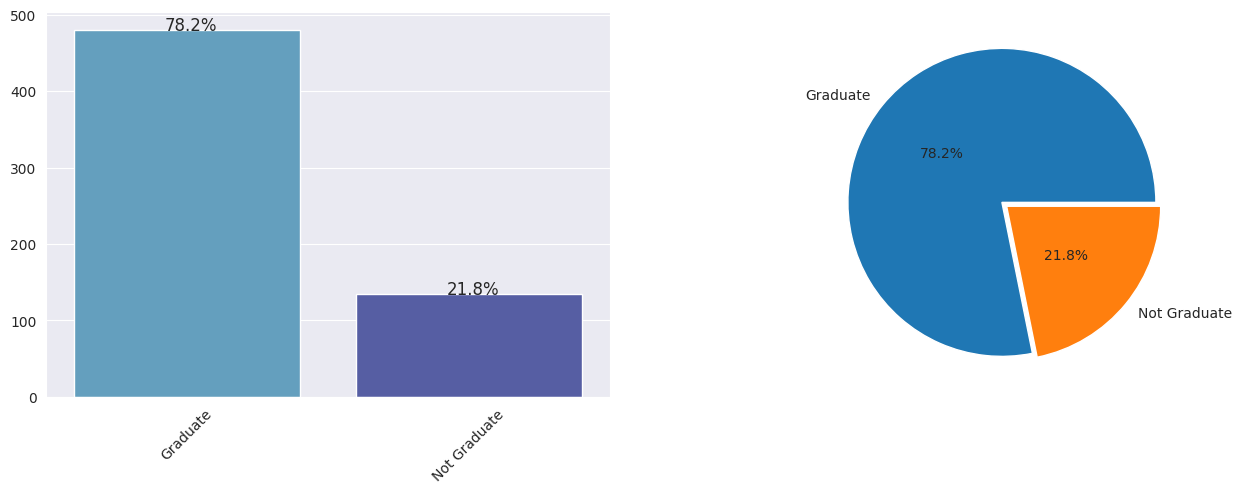

In [ ]:
make_plots(df.Education)

Total unique values are:  2 


Category	Value

Y    422
N    192
Name: Status, dtype: int64


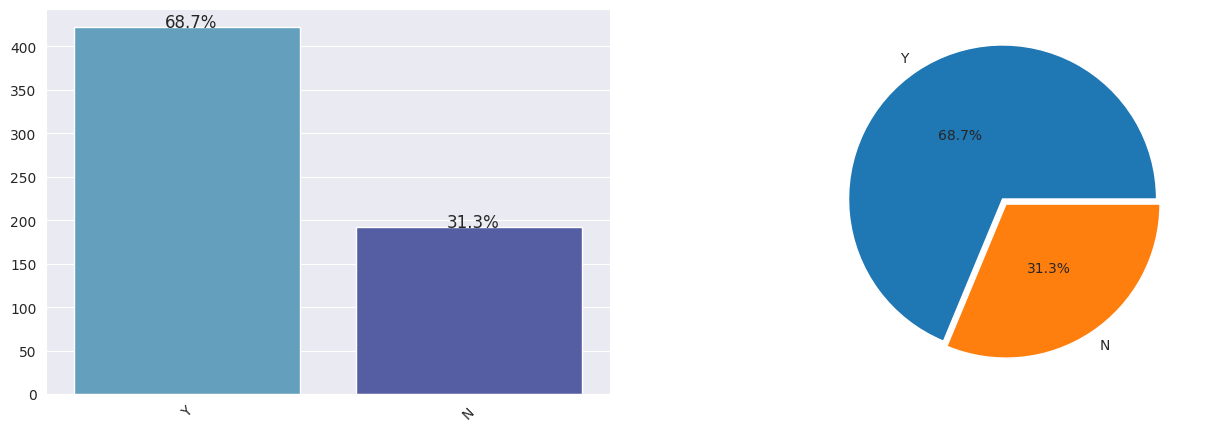

In [ ]:
make_plots(df.Status)

Total unique values are:  2 


Category	Value

True     525
False     89
Name: Credit_History, dtype: int64


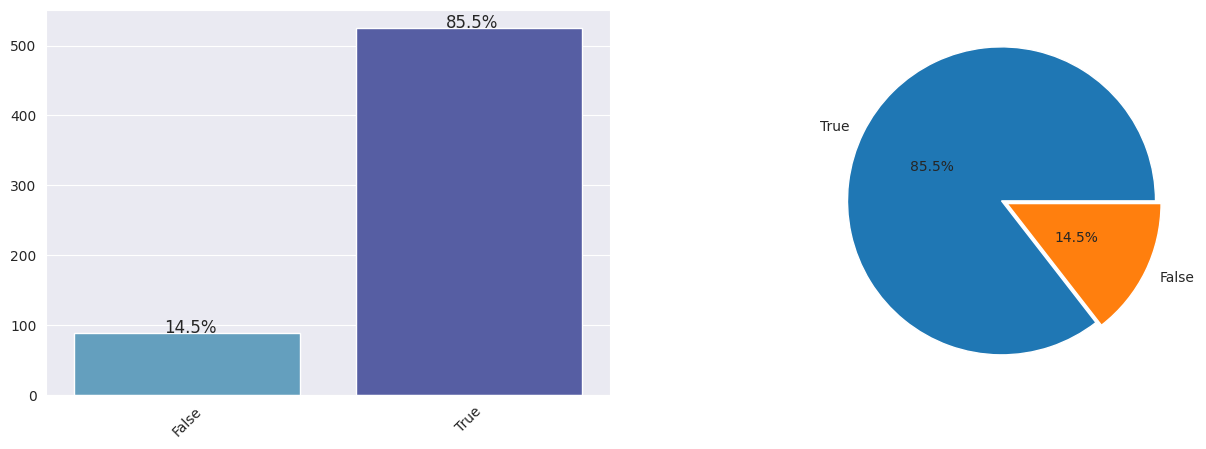

In [ ]:
make_plots(df.Credit_History)

In [ ]:
from scipy.stats import chi2_contingency
cross_tab = pd.crosstab(df['Education'], df['Status'])
chi2, p, dof, expected = chi2_contingency(cross_tab)

# Set the significance level (alpha)
alpha = 0.05

# Print the results
print("Chi-squared statistic:", chi2)
print("P-value:", p)
print("Degrees of freedom:", dof)
print("Expected frequencies table:")
print(expected)

# Interpret the results
if p < alpha:
    print("Reject the null hypothesis: There is a significant association between education level and loan approval.")
else:
    print("Fail to reject the null hypothesis: No significant association between education level and loan approval.")


Chi-squared statistic: 4.091490413303621
P-value: 0.04309962129357355
Degrees of freedom: 1
Expected frequencies table:
[[150.09771987 329.90228013]
 [ 41.90228013  92.09771987]]
Reject the null hypothesis: There is a significant association between education level and loan approval.


In [ ]:
from scipy.stats import chi2_contingency
cross_tab = pd.crosstab(df['Area'], df['Status'])
chi2, p, dof, expected = chi2_contingency(cross_tab)

# Set the significance level (alpha)
alpha = 0.05

# Print the results
print("Chi-squared statistic:", chi2)
print("P-value:", p)
print("Degrees of freedom:", dof)
print("Expected frequencies table:")
print(expected)

# Interpret the results
if p < alpha:
    print("Reject the null hypothesis: There is a significant association between Area and loan approval.")
else:
    print("Fail to reject the null hypothesis: No significant association between Area  and loan approval.")


Chi-squared statistic: 12.297623130485675
P-value: 0.0021360187811644937
Degrees of freedom: 2
Expected frequencies table:
[[ 55.97394137 123.02605863]
 [ 72.85993485 160.14006515]
 [ 63.16612378 138.83387622]]
Reject the null hypothesis: There is a significant association between Area and loan approval.


In [ ]:
from scipy.stats import chi2_contingency
chi2, p, dof, expected = chi2_contingency(cross_tab)

# Set the significance level (alpha)
alpha = 0.05

# Print the results
print("Chi-squared statistic:", chi2)
print("P-value:", p)
print("Degrees of freedom:", dof)
print("Expected frequencies table:")
print(expected)

# Interpret the results
if p < alpha:
    print("Reject the null hypothesis: There is a significant association between education level and loan approval.")
else:
    print("Fail to reject the null hypothesis: No significant association between education level and loan approval.")


Chi-squared statistic: 12.297623130485675
P-value: 0.0021360187811644937
Degrees of freedom: 2
Expected frequencies table:
[[ 55.97394137 123.02605863]
 [ 72.85993485 160.14006515]
 [ 63.16612378 138.83387622]]
Reject the null hypothesis: There is a significant association between education level and loan approval.


In [ ]:
df.shape

(614, 12)

In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder,LabelEncoder

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
num_col = df.select_dtypes(exclude='object').columns

In [ ]:
df.describe()

,Applicant_Income,Coapplicant_Income,Loan_Amount,Term
count,6.140000e+02,6.140000e+02,6.140000e+02,600.00000
mean,5.403459e+05,1.621246e+05,1.414104e+07,342.00000
std,6.109042e+05,2.926248e+05,8.815682e+06,65.12041
min,1.500000e+04,0.000000e+00,0.000000e+00,12.00000
25%,2.877500e+05,0.000000e+00,9.800000e+06,360.00000
50%,3.812500e+05,1.188500e+05,1.250000e+07,360.00000
75%,5.795000e+05,2.297250e+05,1.647500e+07,360.00000
max,8.100000e+06,4.166700e+06,7.000000e+07,480.00000


<Axes: xlabel='Applicant_Income', ylabel='Loan_Amount'>

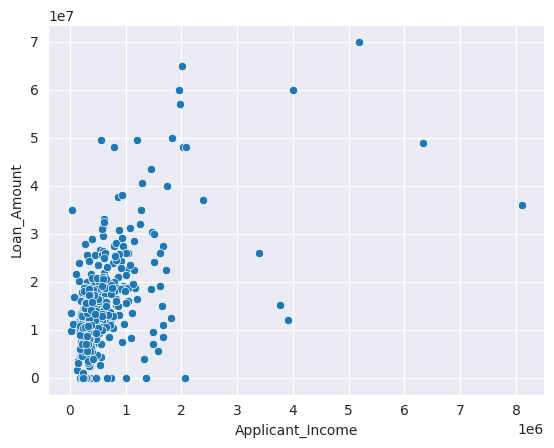

In [ ]:
sns.scatterplot(x=df['Applicant_Income'],y=df['Loan_Amount'])

There are 2 ways to find the correlation b/w columns

1.Pearson Correlation


2.Spearman Correlation

It use the rank system to find out the correlation b/w columns due to which correlation is not affected by outliers

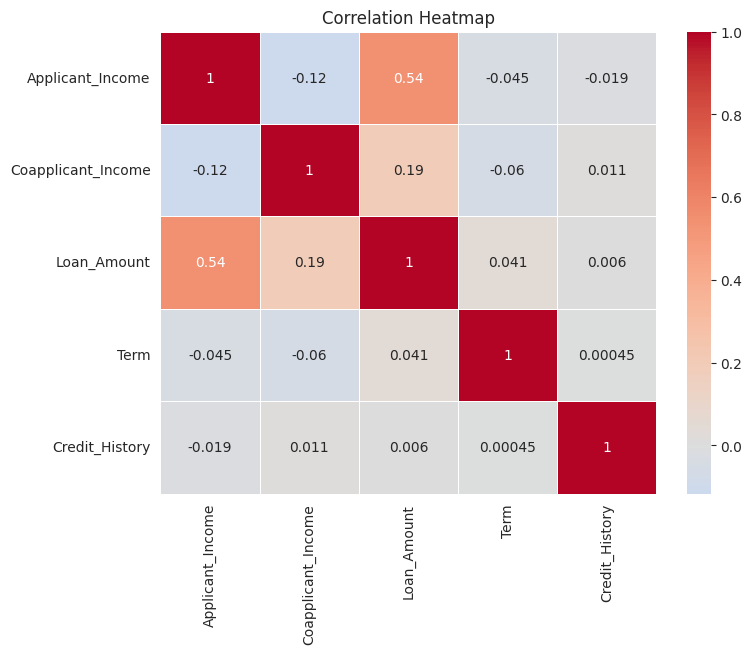

In [ ]:
# Pearson Correlation
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', center=0, linewidths=.5)
plt.title("Correlation Heatmap")
plt.show()
plt.show()

In [ ]:
num_col

Index(['Applicant_Income', 'Coapplicant_Income', 'Loan_Amount', 'Term',
       'Credit_History'],
      dtype='object')

In [ ]:
df['Credit_History'].isnull().sum()

0

In [ ]:
num_col = list(num_col.values)
num_col.remove("Credit_History")

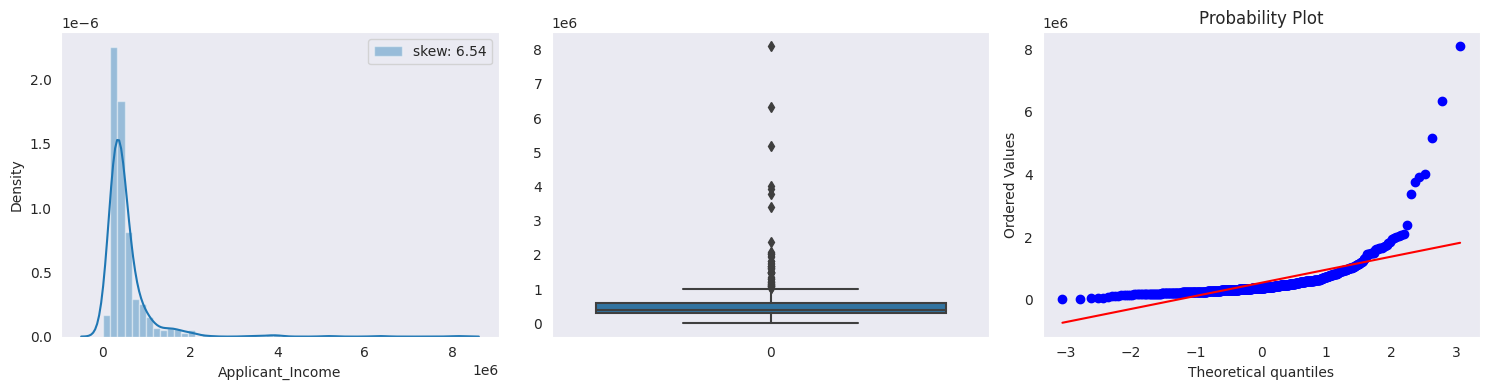

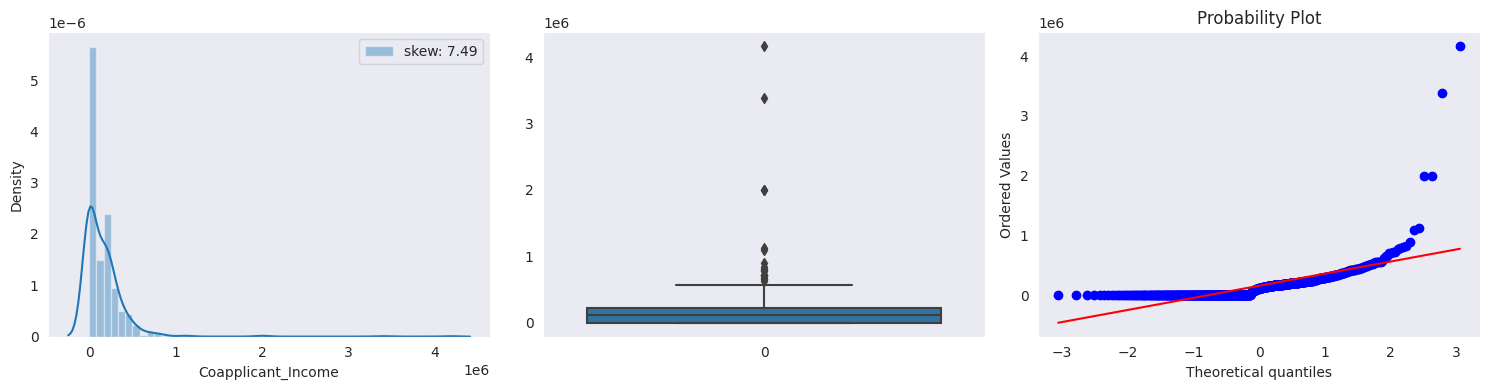

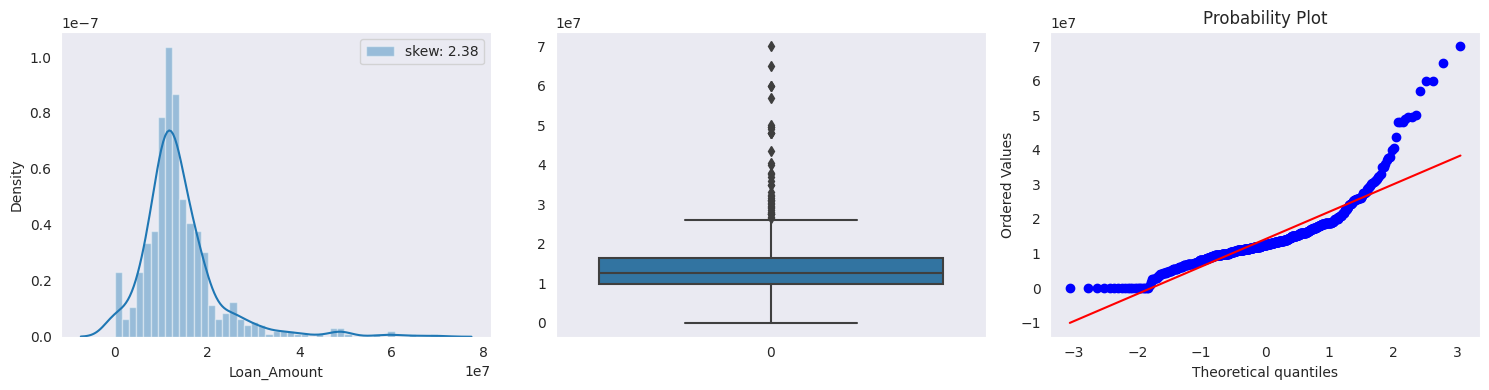

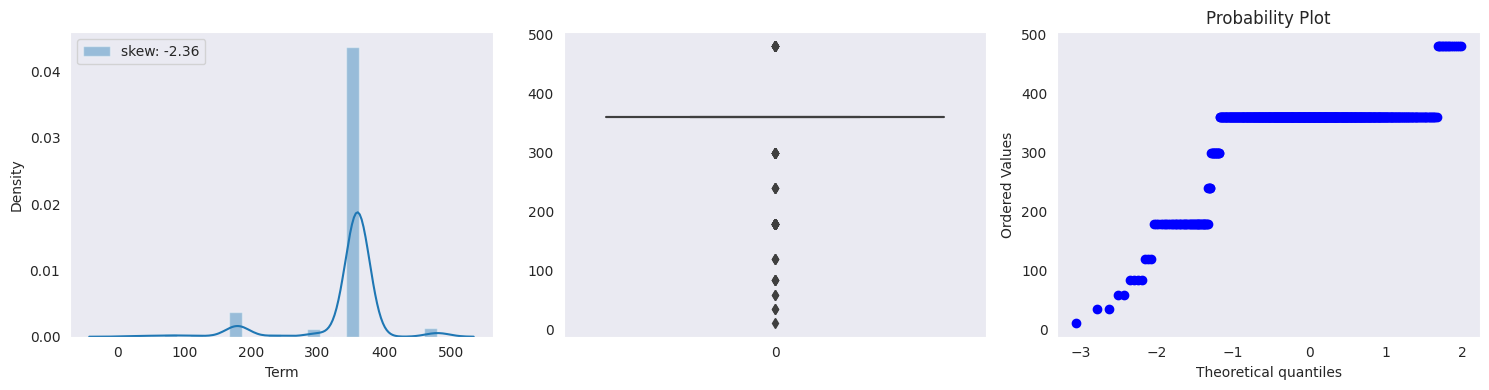

In [ ]:
import warnings
import scipy.stats as stats

import warnings

warnings.simplefilter("ignore")
features = num_col
import seaborn as sns
sns.set_style('dark')
for col in features:
  try:

    plt.figure(figsize=(15,4))
    plt.subplot(131)
    sns.distplot(df[col], label="skew: " + str(np.round(df[col].skew(),2)))
    plt.legend()
    plt.subplot(132)
    sns.boxplot(df[col])
    plt.subplot(133)
    stats.probplot(df[col],dist="norm", plot=plt)
    plt.tight_layout()
    plt.show()
  except:
    pass

In [ ]:
def iqr_capping(df, cols, factor):

    for col in cols:
      try:
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)

        iqr = q3 - q1

        upper_whisker = q3 + (factor*iqr)
        lower_whisker = q1 - (factor*iqr)

        df[col] = np.where(
            df[col] > upper_whisker,
            upper_whisker,
            np.where(
        df[col] < lower_whisker,
        lower_whisker,
        df[col]))
      except:
        pass
    return df



df = iqr_capping(df, num_col, 1.5)


In [ ]:
df['Status'] = LabelEncoder().fit_transform(df['Status'])

In [ ]:
X= df.drop('Status',axis=1)
y=df['Status']
from sklearn.model_selection import train_test_split,cross_val_score
x_train, x_test, y_train, y_test = train_test_split(X,y, random_state = 42, test_size = 0.2)

In [ ]:
x_train.isnull().sum()

Gender                12
Married                1
Dependents            11
Education              0
Self_Employed         24
Applicant_Income       0
Coapplicant_Income     0
Loan_Amount            0
Term                  12
Credit_History         0
Area                   0
dtype: int64

In [ ]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 491 entries, 83 to 102
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Gender              479 non-null    object 
 1   Married             490 non-null    object 
 2   Dependents          480 non-null    object 
 3   Education           491 non-null    object 
 4   Self_Employed       467 non-null    object 
 5   Applicant_Income    491 non-null    float64
 6   Coapplicant_Income  491 non-null    float64
 7   Loan_Amount         491 non-null    float64
 8   Term                479 non-null    float64
 9   Credit_History      491 non-null    bool   
 10  Area                491 non-null    object 
dtypes: bool(1), float64(4), object(6)
memory usage: 42.7+ KB


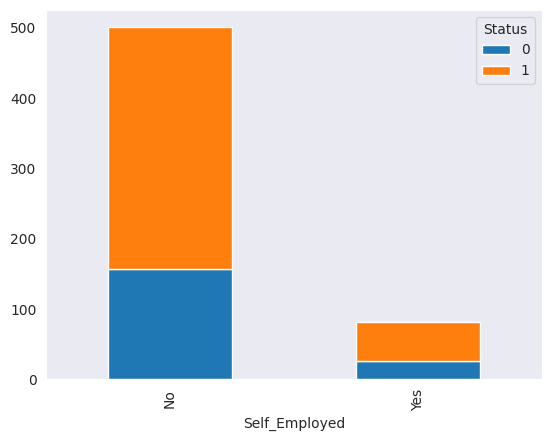

In [ ]:
pd.crosstab(df.Self_Employed, df.Status).plot(kind='bar', stacked=True)
plt.show()

In [ ]:
df.head(1)

,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Term,Credit_History,Area,Status
0,Male,No,0,Graduate,No,584900.0,0.0,15000000.0,360.0,True,Urban,1


In [ ]:
from sklearn.pipeline import Pipeline,make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler,Normalizer
from sklearn.preprocessing import PowerTransformer,FunctionTransformer,OrdinalEncoder,OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest,chi2

# Impute missing values using train data

tns_na = ColumnTransformer(transformers=[
     ('median',SimpleImputer(strategy='median'),[5,7,8]),
     ('mode',SimpleImputer(strategy='most_frequent'),[0,1,2,3,4,6,9,10])

],remainder='passthrough')

tns_ohe = ColumnTransformer(transformers=[
        ('tnf2',OneHotEncoder(sparse=False,drop='first',handle_unknown='ignore'),[3,4,5,6,7,8,9,10]),

],remainder='passthrough')



import numpy as np

pt = PowerTransformer()

model = RandomForestClassifier()


pipe = Pipeline([
    ('trf_na',tns_na),
    ('trf_ohe',tns_ohe),

     ("pt",pt),

    ('model',model),

])
pipe

Pipeline(steps=[('trf_na',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('median',
                                                  SimpleImputer(strategy='median'),
                                                  [5, 7, 8]),
                                                 ('mode',
                                                  SimpleImputer(strategy='most_frequent'),
                                                  [0, 1, 2, 3, 4, 6, 9, 10])])),
                ('trf_ohe',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('tnf2',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse=False),
                                                  [3, 4, 5, 6, 7, 8, 9, 10])])),
                ('pt', PowerTransformer()),
                ('model', RandomForestClassifier())])

In [ ]:
x_train.iloc[0]

Gender                      Male
Married                      Yes
Dependents                     0
Education               Graduate
Self_Employed                 No
Applicant_Income        600000.0
Coapplicant_Income      225000.0
Loan_Amount           26487500.0
Term                       360.0
Credit_History              True
Area                   Semiurban
Name: 83, dtype: object

In [ ]:
pipe.fit(x_train,y_train)

Pipeline(steps=[('trf_na',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('median',
                                                  SimpleImputer(strategy='median'),
                                                  [5, 7, 8]),
                                                 ('mode',
                                                  SimpleImputer(strategy='most_frequent'),
                                                  [0, 1, 2, 3, 4, 6, 9, 10])])),
                ('trf_ohe',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('tnf2',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse=False),
                                                  [3, 4, 5, 6, 7, 8, 9, 10])])),
                ('pt', PowerTransformer()),
                ('model', RandomForestClassifier())])

In [ ]:
from sklearn.metrics import accuracy_score
pred=pipe.predict(x_test)
acc=accuracy_score(y_test,pred)*100
print(acc)

78.86178861788618


In [ ]:
pipe = Pipeline([
    ('trf_na',tns_na),
    ('trf_ohe',tns_ohe),
     ("pt",pt),
    ("m",model)
  ])



In [ ]:
# pred=pipe.predict(x_test)
# acc=accuracy_score(y_test,pred)*100
# print(acc)
# # Display confusion matrix as a heatmap
# # Create confusion matrix
# cm = confusion_matrix(y_test, pred)
# plt.figure(figsize=(6, 6))
# sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
# plt.title("Confusion Matrix")
# plt.xlabel("Predicted Labels")
# plt.ylabel("True Labels")
# plt.show()

In [ ]:
def cross_val(model):
    accuracies=cross_val_score(estimator=model,X=x_train,y=y_train,cv=10)
    return accuracies.mean()*100

def fit_evaluate(model,name):
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    cross=cross_val(model)
    a_s=accuracy_score(y_test,y_pred)*100
    pre_sc=precision_score(y_test,y_pred)*100
    rec_sc=recall_score(y_test,y_pred)*100
    f1_sc=f1_score(y_test,y_pred)*100
    roc_sc=roc_auc_score(y_test,y_pred)*100
    result=pd.DataFrame([[name,a_s,pre_sc,rec_sc,f1_sc,roc_sc]],columns=['model','accuracy','precision_score','recall_score','f1_score','roc_auc_score'])
    return result


In [ ]:
from sklearn.svm import SVC
svc=SVC()

In [ ]:
models=[("knn",KNeighborsClassifier()),("svc",SVC()),("rf",RandomForestClassifier())]
result_models=pd.DataFrame(columns=['model','accuracy','precision_score','recall_score','f1_score','roc_auc_score'])
for name,model in models:

  pipe = Pipeline([
    ('trf_na',tns_na),
    ('trf_ohe',tns_ohe),

     ("pt",pt),

    ('model',model),

  ])
  results = fit_evaluate(pipe,name)
  result_models=pd.concat([result_models,results])



In [ ]:
result_models.sort_values(by='recall_score',ascending=False)

,model,accuracy,precision_score,recall_score,f1_score,roc_auc_score
0,rf,78.048780,75.728155,97.50,85.245902,69.680233
0,svc,79.674797,77.777778,96.25,86.033520,72.543605
0,knn,73.170732,72.815534,93.75,81.967213,64.316860


In [ ]:
result_models[['model','accuracy',]]